# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import owm_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

# Increase the resolution of the figures
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


### Generate the Cities List by Using the `citipy` Library

In [114]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=150000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=150000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 10865


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [115]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + owm_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | sao jose da coroa grande
Processing Record 3 of Set 1 | san ramon
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | coari
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | lilongwe
Processing Record 11 of Set 1 | vila velha
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | barra
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | makat
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | busselton
Processing Record 2

Processing Record 35 of Set 4 | cuamba
Processing Record 36 of Set 4 | cabo san lucas
Processing Record 37 of Set 4 | beloha
Processing Record 38 of Set 4 | danville
Processing Record 39 of Set 4 | mildura
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | uwayl
City not found. Skipping...
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | acarau
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | fuente de oro
Processing Record 48 of Set 4 | darhan
Processing Record 49 of Set 4 | narsaq
Processing Record 0 of Set 5 | leningradskiy
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | huallanca
Processing Record 3 of Set 5 | kenai
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | pangai
Processing Record 6 of Set 5 | altay
Processing Record 7 of Set 5 | bilibino
Process

Processing Record 22 of Set 8 | katy
Processing Record 23 of Set 8 | santa vitoria do palmar
Processing Record 24 of Set 8 | christchurch
Processing Record 25 of Set 8 | ulladulla
Processing Record 26 of Set 8 | mareeba
Processing Record 27 of Set 8 | fosser
City not found. Skipping...
Processing Record 28 of Set 8 | koslan
Processing Record 29 of Set 8 | richards bay
Processing Record 30 of Set 8 | bongor
Processing Record 31 of Set 8 | umm bab
Processing Record 32 of Set 8 | maniitsoq
Processing Record 33 of Set 8 | bataipora
Processing Record 34 of Set 8 | billings
Processing Record 35 of Set 8 | lichinga
Processing Record 36 of Set 8 | chokurdakh
Processing Record 37 of Set 8 | tatawin
Processing Record 38 of Set 8 | samusu
City not found. Skipping...
Processing Record 39 of Set 8 | nelson bay
Processing Record 40 of Set 8 | krasnyy chikoy
Processing Record 41 of Set 8 | de aar
Processing Record 42 of Set 8 | clermont
Processing Record 43 of Set 8 | san pedro
Processing Record 44 o

Processing Record 7 of Set 12 | inhambane
Processing Record 8 of Set 12 | asau
Processing Record 9 of Set 12 | tobane
Processing Record 10 of Set 12 | maicao
Processing Record 11 of Set 12 | ayorou
Processing Record 12 of Set 12 | ram das
Processing Record 13 of Set 12 | hasaki
Processing Record 14 of Set 12 | sulangan
Processing Record 15 of Set 12 | waddan
Processing Record 16 of Set 12 | comacchio
Processing Record 17 of Set 12 | borovskoy
Processing Record 18 of Set 12 | soyo
Processing Record 19 of Set 12 | san carlos
Processing Record 20 of Set 12 | karczew
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | lephepe
City not found. Skipping...
Processing Record 23 of Set 12 | mitake
Processing Record 24 of Set 12 | turtas
Processing Record 25 of Set 12 | avera
Processing Record 26 of Set 12 | shalinskoye
Processing Record 27 of Set 12 | pakala
Processing Record 28 of Set 12 | labutta
City not found. Skipping...
Processing Record 29 of Set 12 | khasan
Processing

Processing Record 41 of Set 15 | morinville
Processing Record 42 of Set 15 | maputo
Processing Record 43 of Set 15 | bloemfontein
Processing Record 44 of Set 15 | aksu
Processing Record 45 of Set 15 | yantongshan
Processing Record 46 of Set 15 | rogun
City not found. Skipping...
Processing Record 47 of Set 15 | eureka
Processing Record 48 of Set 15 | port-gentil
Processing Record 49 of Set 15 | yen bai
Processing Record 0 of Set 16 | vidim
Processing Record 1 of Set 16 | naze
Processing Record 2 of Set 16 | mount isa
Processing Record 3 of Set 16 | ilhabela
Processing Record 4 of Set 16 | yerbogachen
Processing Record 5 of Set 16 | boatlaname
City not found. Skipping...
Processing Record 6 of Set 16 | umm kaddadah
Processing Record 7 of Set 16 | ilulissat
Processing Record 8 of Set 16 | chake chake
Processing Record 9 of Set 16 | sola
Processing Record 10 of Set 16 | corrente
Processing Record 11 of Set 16 | sakakah
Processing Record 12 of Set 16 | umzimvubu
City not found. Skipping...

Processing Record 27 of Set 19 | mahanoro
Processing Record 28 of Set 19 | omboue
Processing Record 29 of Set 19 | lushunkou
City not found. Skipping...
Processing Record 30 of Set 19 | tazovskiy
Processing Record 31 of Set 19 | blantyre
Processing Record 32 of Set 19 | kijabe
Processing Record 33 of Set 19 | aloleng
Processing Record 34 of Set 19 | araceli
Processing Record 35 of Set 19 | rantoul
Processing Record 36 of Set 19 | waterloo
Processing Record 37 of Set 19 | cairns
Processing Record 38 of Set 19 | shubarshi
Processing Record 39 of Set 19 | ponto novo
Processing Record 40 of Set 19 | mitu
Processing Record 41 of Set 19 | epe
Processing Record 42 of Set 19 | inta
Processing Record 43 of Set 19 | dekar
Processing Record 44 of Set 19 | hariana
Processing Record 45 of Set 19 | orotukan
Processing Record 46 of Set 19 | panayakan
City not found. Skipping...
Processing Record 47 of Set 19 | bahia de caraquez
Processing Record 48 of Set 19 | bowen
Processing Record 49 of Set 19 | r

Processing Record 11 of Set 23 | liwonde
Processing Record 12 of Set 23 | rancho palos verdes
Processing Record 13 of Set 23 | pingliang
Processing Record 14 of Set 23 | pemba
Processing Record 15 of Set 23 | katherine
Processing Record 16 of Set 23 | cabedelo
Processing Record 17 of Set 23 | homer
Processing Record 18 of Set 23 | nago
Processing Record 19 of Set 23 | nepa nagar
Processing Record 20 of Set 23 | todos santos
Processing Record 21 of Set 23 | leshukonskoye
Processing Record 22 of Set 23 | ciras
City not found. Skipping...
Processing Record 23 of Set 23 | vysokogornyy
Processing Record 24 of Set 23 | kaiyuan
Processing Record 25 of Set 23 | khonuu
City not found. Skipping...
Processing Record 26 of Set 23 | banepa
Processing Record 27 of Set 23 | amursk
Processing Record 28 of Set 23 | daxian
City not found. Skipping...
Processing Record 29 of Set 23 | anloga
Processing Record 30 of Set 23 | yorosso
Processing Record 31 of Set 23 | turkmenabat
Processing Record 32 of Set 2

Processing Record 48 of Set 26 | preobrazheniye
Processing Record 49 of Set 26 | villamontes
Processing Record 0 of Set 27 | bolsheustikinskoye
City not found. Skipping...
Processing Record 1 of Set 27 | ornskoldsvik
Processing Record 2 of Set 27 | ciudad bolivar
Processing Record 3 of Set 27 | alakurtti
Processing Record 4 of Set 27 | grahamstown
Processing Record 5 of Set 27 | lima
Processing Record 6 of Set 27 | uramita
Processing Record 7 of Set 27 | orgun
City not found. Skipping...
Processing Record 8 of Set 27 | waingapu
Processing Record 9 of Set 27 | kokstad
Processing Record 10 of Set 27 | kailua
Processing Record 11 of Set 27 | bireun
Processing Record 12 of Set 27 | hihifo
City not found. Skipping...
Processing Record 13 of Set 27 | bilma
Processing Record 14 of Set 27 | masalli
Processing Record 15 of Set 27 | manzhouli
Processing Record 16 of Set 27 | comodoro rivadavia
Processing Record 17 of Set 27 | lakatoro
Processing Record 18 of Set 27 | tahta
Processing Record 19 o

Processing Record 33 of Set 30 | barinas
Processing Record 34 of Set 30 | muros
Processing Record 35 of Set 30 | sahuaripa
Processing Record 36 of Set 30 | albania
Processing Record 37 of Set 30 | bartica
Processing Record 38 of Set 30 | estancia
Processing Record 39 of Set 30 | hope
Processing Record 40 of Set 30 | talara
Processing Record 41 of Set 30 | yarada
Processing Record 42 of Set 30 | dryden
Processing Record 43 of Set 30 | sol-iletsk
Processing Record 44 of Set 30 | menomonie
Processing Record 45 of Set 30 | mpika
Processing Record 46 of Set 30 | york
Processing Record 47 of Set 30 | batagay-alyta
Processing Record 48 of Set 30 | acajutla
Processing Record 49 of Set 30 | gunzburg
Processing Record 0 of Set 31 | klyuchi
Processing Record 1 of Set 31 | ipixuna
Processing Record 2 of Set 31 | tarata
Processing Record 3 of Set 31 | sainte-anne-des-monts
Processing Record 4 of Set 31 | gamba
Processing Record 5 of Set 31 | creel
Processing Record 6 of Set 31 | jardim
Processing R

Processing Record 20 of Set 34 | ardistan
City not found. Skipping...
Processing Record 21 of Set 34 | papara
Processing Record 22 of Set 34 | khor
Processing Record 23 of Set 34 | nzega
Processing Record 24 of Set 34 | diplo
Processing Record 25 of Set 34 | poronaysk
Processing Record 26 of Set 34 | vallenar
Processing Record 27 of Set 34 | nisia floresta
Processing Record 28 of Set 34 | casa branca
Processing Record 29 of Set 34 | kayes
Processing Record 30 of Set 34 | angren
Processing Record 31 of Set 34 | wajima
Processing Record 32 of Set 34 | nayoro
Processing Record 33 of Set 34 | kazalinsk
City not found. Skipping...
Processing Record 34 of Set 34 | dolores
Processing Record 35 of Set 34 | vacha
Processing Record 36 of Set 34 | trimbak
Processing Record 37 of Set 34 | pecos
Processing Record 38 of Set 34 | tougue
Processing Record 39 of Set 34 | ndola
Processing Record 40 of Set 34 | kommunar
Processing Record 41 of Set 34 | bosaso
Processing Record 42 of Set 34 | porbandar
Pr

Processing Record 9 of Set 38 | karonga
Processing Record 10 of Set 38 | bihac
Processing Record 11 of Set 38 | chacabuco
Processing Record 12 of Set 38 | miles city
Processing Record 13 of Set 38 | deniliquin
Processing Record 14 of Set 38 | coos bay
Processing Record 15 of Set 38 | kabansk
Processing Record 16 of Set 38 | zachagansk
City not found. Skipping...
Processing Record 17 of Set 38 | tonj
Processing Record 18 of Set 38 | aflu
City not found. Skipping...
Processing Record 19 of Set 38 | tuy hoa
Processing Record 20 of Set 38 | cookeville
Processing Record 21 of Set 38 | ferkessedougou
Processing Record 22 of Set 38 | la libertad
Processing Record 23 of Set 38 | sao miguel do araguaia
Processing Record 24 of Set 38 | dosso
Processing Record 25 of Set 38 | himatnagar
Processing Record 26 of Set 38 | kimberley
Processing Record 27 of Set 38 | yekaterinoslavka
Processing Record 28 of Set 38 | kerman
Processing Record 29 of Set 38 | karkaralinsk
City not found. Skipping...
Process

Processing Record 45 of Set 41 | makarov
Processing Record 46 of Set 41 | lanzhou
Processing Record 47 of Set 41 | felanitx
Processing Record 48 of Set 41 | soligalich
Processing Record 49 of Set 41 | hvammstangi
City not found. Skipping...
Processing Record 0 of Set 42 | bon accord
Processing Record 1 of Set 42 | biloela
Processing Record 2 of Set 42 | ustka
Processing Record 3 of Set 42 | homa bay
Processing Record 4 of Set 42 | bourail
Processing Record 5 of Set 42 | north bend
Processing Record 6 of Set 42 | macklin
Processing Record 7 of Set 42 | bodden town
Processing Record 8 of Set 42 | sainte-maxime
Processing Record 9 of Set 42 | renfrew
Processing Record 10 of Set 42 | yoichi
Processing Record 11 of Set 42 | guadalajara
Processing Record 12 of Set 42 | tugulym
Processing Record 13 of Set 42 | luzhou
Processing Record 14 of Set 42 | kapasan
Processing Record 15 of Set 42 | morristown
Processing Record 16 of Set 42 | jinan
Processing Record 17 of Set 42 | canyon
Processing Rec

Processing Record 34 of Set 45 | douentza
Processing Record 35 of Set 45 | tari
Processing Record 36 of Set 45 | jambi
Processing Record 37 of Set 45 | yuanping
Processing Record 38 of Set 45 | chardara
Processing Record 39 of Set 45 | abiy adi
City not found. Skipping...
Processing Record 40 of Set 45 | benin
Processing Record 41 of Set 45 | namanga
Processing Record 42 of Set 45 | ales
Processing Record 43 of Set 45 | blatnica
Processing Record 44 of Set 45 | jiuquan
Processing Record 45 of Set 45 | polva
Processing Record 46 of Set 45 | bogovarovo
Processing Record 47 of Set 45 | clovis
Processing Record 48 of Set 45 | paragominas
Processing Record 49 of Set 45 | leeton
Processing Record 0 of Set 46 | sulina
Processing Record 1 of Set 46 | roxana
Processing Record 2 of Set 46 | guiren
Processing Record 3 of Set 46 | kanniyakumari
Processing Record 4 of Set 46 | holme
Processing Record 5 of Set 46 | rafai
Processing Record 6 of Set 46 | zaykovo
Processing Record 7 of Set 46 | araguac

Processing Record 22 of Set 49 | mundgod
Processing Record 23 of Set 49 | mankera
Processing Record 24 of Set 49 | abeche
Processing Record 25 of Set 49 | temir
Processing Record 26 of Set 49 | myitkyina
Processing Record 27 of Set 49 | kargopol
Processing Record 28 of Set 49 | nkayi
Processing Record 29 of Set 49 | hella
Processing Record 30 of Set 49 | rybachiy
Processing Record 31 of Set 49 | wote
Processing Record 32 of Set 49 | carire
Processing Record 33 of Set 49 | tynda
Processing Record 34 of Set 49 | nabisar
Processing Record 35 of Set 49 | cam ranh
Processing Record 36 of Set 49 | geresk
City not found. Skipping...
Processing Record 37 of Set 49 | marv dasht
City not found. Skipping...
Processing Record 38 of Set 49 | tokoroa
Processing Record 39 of Set 49 | moose jaw
Processing Record 40 of Set 49 | toguchin
Processing Record 41 of Set 49 | malakal
Processing Record 42 of Set 49 | capreol
Processing Record 43 of Set 49 | stockbridge
Processing Record 44 of Set 49 | wanderla

Processing Record 12 of Set 53 | ranong
Processing Record 13 of Set 53 | san angelo
Processing Record 14 of Set 53 | xinzhou
Processing Record 15 of Set 53 | pingshan
Processing Record 16 of Set 53 | el tocuyo
Processing Record 17 of Set 53 | quelimane
Processing Record 18 of Set 53 | ibung
Processing Record 19 of Set 53 | san juan
Processing Record 20 of Set 53 | verkhnyaya toyma
Processing Record 21 of Set 53 | joplin
Processing Record 22 of Set 53 | sagua de tanamo
Processing Record 23 of Set 53 | dossor
Processing Record 24 of Set 53 | lae
Processing Record 25 of Set 53 | dortmund
Processing Record 26 of Set 53 | black river
Processing Record 27 of Set 53 | meghraj
Processing Record 28 of Set 53 | ajaccio
Processing Record 29 of Set 53 | vilshofen
Processing Record 30 of Set 53 | minsk
Processing Record 31 of Set 53 | deer lake
Processing Record 32 of Set 53 | sao felix do xingu
Processing Record 33 of Set 53 | hlukhiv
Processing Record 34 of Set 53 | barranca
Processing Record 35 

Processing Record 0 of Set 57 | kapit
Processing Record 1 of Set 57 | chulym
Processing Record 2 of Set 57 | cutlerville
Processing Record 3 of Set 57 | buqayq
City not found. Skipping...
Processing Record 4 of Set 57 | jeremie
Processing Record 5 of Set 57 | fallon
Processing Record 6 of Set 57 | bhatkal
Processing Record 7 of Set 57 | ust-tsilma
Processing Record 8 of Set 57 | newcastle
Processing Record 9 of Set 57 | zhireken
Processing Record 10 of Set 57 | teguise
Processing Record 11 of Set 57 | yingcheng
Processing Record 12 of Set 57 | valle hermoso
Processing Record 13 of Set 57 | cumaribo
City not found. Skipping...
Processing Record 14 of Set 57 | barkot
Processing Record 15 of Set 57 | venice
Processing Record 16 of Set 57 | palm valley
Processing Record 17 of Set 57 | rawlins
Processing Record 18 of Set 57 | isilkul
Processing Record 19 of Set 57 | takhli
Processing Record 20 of Set 57 | ararat
Processing Record 21 of Set 57 | gavle
Processing Record 22 of Set 57 | bhadrac

Processing Record 40 of Set 60 | makasar
Processing Record 41 of Set 60 | keti bandar
Processing Record 42 of Set 60 | shiliguri
Processing Record 43 of Set 60 | gaoual
Processing Record 44 of Set 60 | tarrega
Processing Record 45 of Set 60 | jiexiu
Processing Record 46 of Set 60 | ferme-neuve
Processing Record 47 of Set 60 | galgani
City not found. Skipping...
Processing Record 48 of Set 60 | aguilas
Processing Record 49 of Set 60 | karaton
Processing Record 0 of Set 61 | danielskuil
Processing Record 1 of Set 61 | esqueda
Processing Record 2 of Set 61 | junin
Processing Record 3 of Set 61 | gohad
Processing Record 4 of Set 61 | sao gabriel da cachoeira
Processing Record 5 of Set 61 | saquena
Processing Record 6 of Set 61 | linjiang
Processing Record 7 of Set 61 | nchelenge
Processing Record 8 of Set 61 | kastamonu
Processing Record 9 of Set 61 | vostochnyy
Processing Record 10 of Set 61 | balti
Processing Record 11 of Set 61 | qostanay
Processing Record 12 of Set 61 | nankana sahib
P

Processing Record 25 of Set 64 | polovinnoye
Processing Record 26 of Set 64 | bada
Processing Record 27 of Set 64 | helong
Processing Record 28 of Set 64 | media luna
Processing Record 29 of Set 64 | aybak
City not found. Skipping...
Processing Record 30 of Set 64 | stuttgart
Processing Record 31 of Set 64 | bulawayo
Processing Record 32 of Set 64 | rocky mountain house
Processing Record 33 of Set 64 | huntington beach
Processing Record 34 of Set 64 | solovetskiy
City not found. Skipping...
Processing Record 35 of Set 64 | ardahan
Processing Record 36 of Set 64 | oak ridge
Processing Record 37 of Set 64 | hirado
Processing Record 38 of Set 64 | zhovtneve
Processing Record 39 of Set 64 | coachella
Processing Record 40 of Set 64 | cabildo
Processing Record 41 of Set 64 | slobidka
Processing Record 42 of Set 64 | hagi
Processing Record 43 of Set 64 | kano
Processing Record 44 of Set 64 | shahrud
Processing Record 45 of Set 64 | isetskoye
Processing Record 46 of Set 64 | treinta y tres
Pro

Processing Record 13 of Set 68 | gubkinskiy
Processing Record 14 of Set 68 | kiama
Processing Record 15 of Set 68 | druzhnaya gorka
Processing Record 16 of Set 68 | sar-e pul
Processing Record 17 of Set 68 | polyarnyy
Processing Record 18 of Set 68 | mizan teferi
Processing Record 19 of Set 68 | amudat
Processing Record 20 of Set 68 | sheltozero
Processing Record 21 of Set 68 | timizart
Processing Record 22 of Set 68 | swift current
Processing Record 23 of Set 68 | winslow
Processing Record 24 of Set 68 | uelzen
Processing Record 25 of Set 68 | hefei
Processing Record 26 of Set 68 | abu dhabi
Processing Record 27 of Set 68 | charleston
Processing Record 28 of Set 68 | chandvad
Processing Record 29 of Set 68 | kintinku
Processing Record 30 of Set 68 | katsina
Processing Record 31 of Set 68 | nardaran
Processing Record 32 of Set 68 | camponogara
Processing Record 33 of Set 68 | dehloran
Processing Record 34 of Set 68 | haapiti
Processing Record 35 of Set 68 | issaquah
Processing Record 3

Processing Record 49 of Set 71 | bolshoye bunkovo
City not found. Skipping...
Processing Record 0 of Set 72 | stepnyak
Processing Record 1 of Set 72 | khed brahma
Processing Record 2 of Set 72 | caramay
Processing Record 3 of Set 72 | dotnuva
Processing Record 4 of Set 72 | breves
Processing Record 5 of Set 72 | turkistan
Processing Record 6 of Set 72 | mansoa
Processing Record 7 of Set 72 | palmi
Processing Record 8 of Set 72 | afmadu
City not found. Skipping...
Processing Record 9 of Set 72 | elko
Processing Record 10 of Set 72 | quthing
Processing Record 11 of Set 72 | kayan
Processing Record 12 of Set 72 | swedru
Processing Record 13 of Set 72 | danao
Processing Record 14 of Set 72 | farrukhnagar
Processing Record 15 of Set 72 | pacocha
Processing Record 16 of Set 72 | khuzhir
Processing Record 17 of Set 72 | doha
Processing Record 18 of Set 72 | pidhaytsi
Processing Record 19 of Set 72 | radenci
Processing Record 20 of Set 72 | saltpond
Processing Record 21 of Set 72 | lodwar
Proc

Processing Record 33 of Set 75 | dzhuryn
Processing Record 34 of Set 75 | phangnga
Processing Record 35 of Set 75 | edd
Processing Record 36 of Set 75 | changying
Processing Record 37 of Set 75 | wucheng
Processing Record 38 of Set 75 | derbent
Processing Record 39 of Set 75 | aurich
Processing Record 40 of Set 75 | ashqelon
Processing Record 41 of Set 75 | manowa
Processing Record 42 of Set 75 | langxiang
Processing Record 43 of Set 75 | lasem
Processing Record 44 of Set 75 | zheleznodorozhnyy
Processing Record 45 of Set 75 | sivas
Processing Record 46 of Set 75 | rivers
Processing Record 47 of Set 75 | wuan
Processing Record 48 of Set 75 | kaohsiung
Processing Record 49 of Set 75 | oarai
Processing Record 0 of Set 76 | cortez
Processing Record 1 of Set 76 | saint-avertin
Processing Record 2 of Set 76 | elwood
Processing Record 3 of Set 76 | porosozero
Processing Record 4 of Set 76 | sigli
Processing Record 5 of Set 76 | wadi musa
Processing Record 6 of Set 76 | seddon
Processing Reco

Processing Record 20 of Set 79 | zuenoula
Processing Record 21 of Set 79 | ruidoso
Processing Record 22 of Set 79 | alexander city
Processing Record 23 of Set 79 | lokosovo
Processing Record 24 of Set 79 | alcaniz
Processing Record 25 of Set 79 | melbourne
Processing Record 26 of Set 79 | srostki
Processing Record 27 of Set 79 | sabirabad
Processing Record 28 of Set 79 | savalou
Processing Record 29 of Set 79 | kleck
City not found. Skipping...
Processing Record 30 of Set 79 | manaskent
Processing Record 31 of Set 79 | smidovich
Processing Record 32 of Set 79 | mayskiy
Processing Record 33 of Set 79 | dong xoai
Processing Record 34 of Set 79 | eldorado
Processing Record 35 of Set 79 | bitkine
Processing Record 36 of Set 79 | asasa
Processing Record 37 of Set 79 | emboscada
Processing Record 38 of Set 79 | sao miguel do iguacu
Processing Record 39 of Set 79 | castelo do piaui
Processing Record 40 of Set 79 | anjozorobe
Processing Record 41 of Set 79 | krutinka
Processing Record 42 of Se

Processing Record 9 of Set 83 | pergamino
Processing Record 10 of Set 83 | porumbacu de jos
Processing Record 11 of Set 83 | kalabo
Processing Record 12 of Set 83 | genhe
Processing Record 13 of Set 83 | durango
Processing Record 14 of Set 83 | maimon
City not found. Skipping...
Processing Record 15 of Set 83 | kemise
Processing Record 16 of Set 83 | kyshtovka
Processing Record 17 of Set 83 | xunchang
Processing Record 18 of Set 83 | akhtubinsk
Processing Record 19 of Set 83 | seminole
Processing Record 20 of Set 83 | johi
Processing Record 21 of Set 83 | lillooet
Processing Record 22 of Set 83 | greenwood
Processing Record 23 of Set 83 | campos belos
Processing Record 24 of Set 83 | koupela
Processing Record 25 of Set 83 | adamas
Processing Record 26 of Set 83 | loikaw
Processing Record 27 of Set 83 | oyem
Processing Record 28 of Set 83 | mbandaka
Processing Record 29 of Set 83 | kankakee
Processing Record 30 of Set 83 | solvychegodsk
Processing Record 31 of Set 83 | vicksburg
Process

Processing Record 48 of Set 86 | solenzo
Processing Record 49 of Set 86 | gorahun
Processing Record 0 of Set 87 | greensboro
Processing Record 1 of Set 87 | challapata
Processing Record 2 of Set 87 | san javier
Processing Record 3 of Set 87 | wyndham
Processing Record 4 of Set 87 | payo
Processing Record 5 of Set 87 | san ignacio
Processing Record 6 of Set 87 | west bay
Processing Record 7 of Set 87 | boissevain
Processing Record 8 of Set 87 | repnoye
Processing Record 9 of Set 87 | qinggang
Processing Record 10 of Set 87 | kabarnet
Processing Record 11 of Set 87 | frutal
Processing Record 12 of Set 87 | sembakung
Processing Record 13 of Set 87 | mudyuga
City not found. Skipping...
Processing Record 14 of Set 87 | niquelandia
Processing Record 15 of Set 87 | hammelburg
Processing Record 16 of Set 87 | gambissara
Processing Record 17 of Set 87 | devils lake
Processing Record 18 of Set 87 | burgos
Processing Record 19 of Set 87 | venustiano carranza
Processing Record 20 of Set 87 | umba


Processing Record 37 of Set 90 | balaipungut
Processing Record 38 of Set 90 | lugovoy
Processing Record 39 of Set 90 | cajaruro
Processing Record 40 of Set 90 | kongoussi
Processing Record 41 of Set 90 | karema
Processing Record 42 of Set 90 | cran-gevrier
Processing Record 43 of Set 90 | solnice
Processing Record 44 of Set 90 | krasnyy luch
Processing Record 45 of Set 90 | bataysk
Processing Record 46 of Set 90 | floro
Processing Record 47 of Set 90 | luancheng
Processing Record 48 of Set 90 | antas
Processing Record 49 of Set 90 | magog
Processing Record 0 of Set 91 | rypefjord
Processing Record 1 of Set 91 | sajanan
Processing Record 2 of Set 91 | garhi khairo
Processing Record 3 of Set 91 | tatvan
Processing Record 4 of Set 91 | jablanica
Processing Record 5 of Set 91 | namtsy
Processing Record 6 of Set 91 | kassala
Processing Record 7 of Set 91 | kirovsk
Processing Record 8 of Set 91 | mahanje
Processing Record 9 of Set 91 | cota
Processing Record 10 of Set 91 | kisesa
Processing 

Processing Record 24 of Set 94 | miyazu
Processing Record 25 of Set 94 | naustdal
Processing Record 26 of Set 94 | tashtyp
Processing Record 27 of Set 94 | urdoma
Processing Record 28 of Set 94 | peyima
Processing Record 29 of Set 94 | gedo
Processing Record 30 of Set 94 | igaracu do tiete
Processing Record 31 of Set 94 | seinajoki
Processing Record 32 of Set 94 | bucerias
Processing Record 33 of Set 94 | north salt lake
Processing Record 34 of Set 94 | manicore
Processing Record 35 of Set 94 | lodeynoye pole
Processing Record 36 of Set 94 | kamra
Processing Record 37 of Set 94 | lubao
Processing Record 38 of Set 94 | candelaria
Processing Record 39 of Set 94 | salina cruz
Processing Record 40 of Set 94 | oxbow
Processing Record 41 of Set 94 | robstown
Processing Record 42 of Set 94 | sayan
Processing Record 43 of Set 94 | cermik
Processing Record 44 of Set 94 | voyvozh
Processing Record 45 of Set 94 | sidmouth
Processing Record 46 of Set 94 | alto araguaia
Processing Record 47 of Set 

Processing Record 14 of Set 98 | mirabela
Processing Record 15 of Set 98 | kaspiyskiy
Processing Record 16 of Set 98 | don sak
Processing Record 17 of Set 98 | santo antonio do sudoeste
Processing Record 18 of Set 98 | kyabe
Processing Record 19 of Set 98 | ravar
Processing Record 20 of Set 98 | adolfo lopez mateos
Processing Record 21 of Set 98 | minot
Processing Record 22 of Set 98 | mezhdurechenskiy
Processing Record 23 of Set 98 | montpellier
Processing Record 24 of Set 98 | tanhacu
Processing Record 25 of Set 98 | katiola
Processing Record 26 of Set 98 | dera bugti
Processing Record 27 of Set 98 | radzyn podlaski
Processing Record 28 of Set 98 | chesley
Processing Record 29 of Set 98 | piranshahr
Processing Record 30 of Set 98 | novozavedennoye
Processing Record 31 of Set 98 | heishan
Processing Record 32 of Set 98 | hemet
Processing Record 33 of Set 98 | ouallam
Processing Record 34 of Set 98 | randazzo
Processing Record 35 of Set 98 | petrosani
Processing Record 36 of Set 98 | m

Processing Record 0 of Set 102 | yian
City not found. Skipping...
Processing Record 1 of Set 102 | taber
Processing Record 2 of Set 102 | bulancak
Processing Record 3 of Set 102 | kashiwazaki
Processing Record 4 of Set 102 | myaundzha
Processing Record 5 of Set 102 | inhumas
Processing Record 6 of Set 102 | huambo
Processing Record 7 of Set 102 | villa union
Processing Record 8 of Set 102 | selikhino
Processing Record 9 of Set 102 | mwadui
Processing Record 10 of Set 102 | san lorenzo
Processing Record 11 of Set 102 | arzignano
Processing Record 12 of Set 102 | huaicheng
Processing Record 13 of Set 102 | nadvoitsy
Processing Record 14 of Set 102 | ouro preto do oeste
Processing Record 15 of Set 102 | fukuma
Processing Record 16 of Set 102 | xuanwu
Processing Record 17 of Set 102 | tangzhai
Processing Record 18 of Set 102 | sedona
Processing Record 19 of Set 102 | bajina basta
Processing Record 20 of Set 102 | manavgat
Processing Record 21 of Set 102 | krasnoturansk
Processing Record 22

Processing Record 34 of Set 105 | castelvetro di modena
Processing Record 35 of Set 105 | ende
Processing Record 36 of Set 105 | guiratinga
Processing Record 37 of Set 105 | tamsweg
Processing Record 38 of Set 105 | bellefontaine
Processing Record 39 of Set 105 | smoky lake
Processing Record 40 of Set 105 | puerto padre
Processing Record 41 of Set 105 | boralday
Processing Record 42 of Set 105 | rolla
Processing Record 43 of Set 105 | litoral del san juan
City not found. Skipping...
Processing Record 44 of Set 105 | tazmalt
Processing Record 45 of Set 105 | shaki
Processing Record 46 of Set 105 | silvan
Processing Record 47 of Set 105 | kingaroy
Processing Record 48 of Set 105 | dagda
Processing Record 49 of Set 105 | sug-aksy
City not found. Skipping...
Processing Record 0 of Set 106 | patterson
Processing Record 1 of Set 106 | oneonta
Processing Record 2 of Set 106 | drummondville
Processing Record 3 of Set 106 | kondopoga
Processing Record 4 of Set 106 | rawannawi
City not found. Sk

Processing Record 14 of Set 109 | bay-khaak
Processing Record 15 of Set 109 | amparo
Processing Record 16 of Set 109 | jala
Processing Record 17 of Set 109 | mulki
Processing Record 18 of Set 109 | bati
Processing Record 19 of Set 109 | baraki barak
Processing Record 20 of Set 109 | podor
Processing Record 21 of Set 109 | kitakami
Processing Record 22 of Set 109 | barreirinhas
Processing Record 23 of Set 109 | kirkwall
Processing Record 24 of Set 109 | sarrebourg
Processing Record 25 of Set 109 | manati
Processing Record 26 of Set 109 | klenovyy
Processing Record 27 of Set 109 | vihti
Processing Record 28 of Set 109 | priargunsk
Processing Record 29 of Set 109 | soissons
Processing Record 30 of Set 109 | aguia branca
Processing Record 31 of Set 109 | wenzhou
Processing Record 32 of Set 109 | balancan
Processing Record 33 of Set 109 | birin
Processing Record 34 of Set 109 | isiolo
Processing Record 35 of Set 109 | mugla
Processing Record 36 of Set 109 | rudnyy
Processing Record 37 of Se

Processing Record 48 of Set 112 | tonekabon
Processing Record 49 of Set 112 | torit
Processing Record 0 of Set 113 | lexington
Processing Record 1 of Set 113 | slavyanka
Processing Record 2 of Set 113 | el fuerte
Processing Record 3 of Set 113 | prata
Processing Record 4 of Set 113 | elk city
Processing Record 5 of Set 113 | marks
Processing Record 6 of Set 113 | bata
Processing Record 7 of Set 113 | livingstone
Processing Record 8 of Set 113 | inongo
Processing Record 9 of Set 113 | hanyang
Processing Record 10 of Set 113 | hermiston
Processing Record 11 of Set 113 | fonte boa
Processing Record 12 of Set 113 | maloyaz
City not found. Skipping...
Processing Record 13 of Set 113 | santa maria da boa vista
Processing Record 14 of Set 113 | fort morgan
Processing Record 15 of Set 113 | sitio novo do tocantins
Processing Record 16 of Set 113 | zahnitkiv
Processing Record 17 of Set 113 | kralendijk
Processing Record 18 of Set 113 | mayna
Processing Record 19 of Set 113 | lobito
Processing R

Processing Record 34 of Set 116 | sharanga
Processing Record 35 of Set 116 | laela
Processing Record 36 of Set 116 | nesna
Processing Record 37 of Set 116 | balakovo
Processing Record 38 of Set 116 | novita
Processing Record 39 of Set 116 | fuyang
Processing Record 40 of Set 116 | carmona
Processing Record 41 of Set 116 | batangafo
Processing Record 42 of Set 116 | gukovo
Processing Record 43 of Set 116 | carlagan
Processing Record 44 of Set 116 | ipoti
Processing Record 45 of Set 116 | arani
Processing Record 46 of Set 116 | mormugao
Processing Record 47 of Set 116 | ifakara
Processing Record 48 of Set 116 | albina
Processing Record 49 of Set 116 | trofors
Processing Record 0 of Set 117 | toledo
Processing Record 1 of Set 117 | nossa senhora da gloria
Processing Record 2 of Set 117 | jaranwala
Processing Record 3 of Set 117 | ballarat
Processing Record 4 of Set 117 | nawabganj
Processing Record 5 of Set 117 | paramount
Processing Record 6 of Set 117 | lengshuijiang
Processing Record 7

Processing Record 20 of Set 120 | riachao do jacuipe
Processing Record 21 of Set 120 | krasnogvardeyskiy
Processing Record 22 of Set 120 | orsha
Processing Record 23 of Set 120 | ken caryl
Processing Record 24 of Set 120 | minamata
Processing Record 25 of Set 120 | yagodnoye
Processing Record 26 of Set 120 | akom
Processing Record 27 of Set 120 | muromtsevo
Processing Record 28 of Set 120 | mahabaleshwar
Processing Record 29 of Set 120 | dargaville
Processing Record 30 of Set 120 | champua
Processing Record 31 of Set 120 | prabumulih
Processing Record 32 of Set 120 | vytegra
Processing Record 33 of Set 120 | magistralnyy
Processing Record 34 of Set 120 | rio tinto
Processing Record 35 of Set 120 | dyatkovo
Processing Record 36 of Set 120 | fort frances
Processing Record 37 of Set 120 | tres lagoas
Processing Record 38 of Set 120 | chaplynka
Processing Record 39 of Set 120 | meiganga
Processing Record 40 of Set 120 | zamora
Processing Record 41 of Set 120 | colombo
Processing Record 42 

Processing Record 8 of Set 124 | enterprise
Processing Record 9 of Set 124 | ihosy
Processing Record 10 of Set 124 | belomorsk
Processing Record 11 of Set 124 | ituacu
Processing Record 12 of Set 124 | eugene
Processing Record 13 of Set 124 | puerto lempira
Processing Record 14 of Set 124 | oulu
Processing Record 15 of Set 124 | petrovskoye
Processing Record 16 of Set 124 | rafsanjan
Processing Record 17 of Set 124 | kissidougou
Processing Record 18 of Set 124 | caranavi
Processing Record 19 of Set 124 | heide
Processing Record 20 of Set 124 | lewistown
Processing Record 21 of Set 124 | antiguo morelos
Processing Record 22 of Set 124 | magrath
Processing Record 23 of Set 124 | gaborone
Processing Record 24 of Set 124 | dukhovshchina
Processing Record 25 of Set 124 | odemira
Processing Record 26 of Set 124 | ahtopol
Processing Record 27 of Set 124 | sumbe
Processing Record 28 of Set 124 | kolpashevo
Processing Record 29 of Set 124 | krasnoye
Processing Record 30 of Set 124 | saint-gabri

Processing Record 41 of Set 127 | eselnita
Processing Record 42 of Set 127 | carepa
Processing Record 43 of Set 127 | lapua
Processing Record 44 of Set 127 | fort dodge
Processing Record 45 of Set 127 | eisenstadt
Processing Record 46 of Set 127 | livramento
Processing Record 47 of Set 127 | lunca ilvei
Processing Record 48 of Set 127 | mahon
Processing Record 49 of Set 127 | shalyhyne
Processing Record 0 of Set 128 | otjimbingwe
Processing Record 1 of Set 128 | osakarovka
Processing Record 2 of Set 128 | tarbes
Processing Record 3 of Set 128 | grande prairie
Processing Record 4 of Set 128 | matongo
Processing Record 5 of Set 128 | falciu
Processing Record 6 of Set 128 | torva
Processing Record 7 of Set 128 | tanga
Processing Record 8 of Set 128 | feira de santana
Processing Record 9 of Set 128 | garcia
Processing Record 10 of Set 128 | selenduma
Processing Record 11 of Set 128 | aliwal north
Processing Record 12 of Set 128 | adeje
Processing Record 13 of Set 128 | medowie
Processing R

Processing Record 29 of Set 131 | kalach-na-donu
Processing Record 30 of Set 131 | snina
Processing Record 31 of Set 131 | pendra
Processing Record 32 of Set 131 | malia
Processing Record 33 of Set 131 | niles
Processing Record 34 of Set 131 | eatonton
Processing Record 35 of Set 131 | jashpurnagar
Processing Record 36 of Set 131 | qorveh
Processing Record 37 of Set 131 | ermoupolis
Processing Record 38 of Set 131 | cerrito
Processing Record 39 of Set 131 | novoanninskiy
Processing Record 40 of Set 131 | muskogee
Processing Record 41 of Set 131 | linqu
Processing Record 42 of Set 131 | aparecida do taboado
Processing Record 43 of Set 131 | kainantu
Processing Record 44 of Set 131 | le portel
Processing Record 45 of Set 131 | zanjan
Processing Record 46 of Set 131 | lulea
Processing Record 47 of Set 131 | terre-de-bas
Processing Record 48 of Set 131 | qunduz
Processing Record 49 of Set 131 | gawler
Processing Record 0 of Set 132 | kirensk
Processing Record 1 of Set 132 | la sarre
Proces

Processing Record 13 of Set 135 | yefira
City not found. Skipping...
Processing Record 14 of Set 135 | kilcoole
Processing Record 15 of Set 135 | virtsu
Processing Record 16 of Set 135 | giraltovce
Processing Record 17 of Set 135 | martapura
Processing Record 18 of Set 135 | dimbokro
Processing Record 19 of Set 135 | campo maior
Processing Record 20 of Set 135 | aranos
Processing Record 21 of Set 135 | paraiba do sul
Processing Record 22 of Set 135 | starosubkhangulovo
Processing Record 23 of Set 135 | bulle
Processing Record 24 of Set 135 | anjiang
Processing Record 25 of Set 135 | wynyard
Processing Record 26 of Set 135 | new braunfels
Processing Record 27 of Set 135 | plaisance-du-touch
Processing Record 28 of Set 135 | plaridel
Processing Record 29 of Set 135 | traverse city
Processing Record 30 of Set 135 | gitarama
Processing Record 31 of Set 135 | san gavino monreale
Processing Record 32 of Set 135 | burley
Processing Record 33 of Set 135 | valley station
Processing Record 34 of

Processing Record 47 of Set 138 | dumas
Processing Record 48 of Set 138 | kabinda
Processing Record 49 of Set 138 | nueva helvecia
Processing Record 0 of Set 139 | zurrieq
Processing Record 1 of Set 139 | mbocayaty
Processing Record 2 of Set 139 | tibiri
Processing Record 3 of Set 139 | azuaga
Processing Record 4 of Set 139 | kibiti
Processing Record 5 of Set 139 | pilikwe
Processing Record 6 of Set 139 | campana
Processing Record 7 of Set 139 | orlat
Processing Record 8 of Set 139 | tarija
Processing Record 9 of Set 139 | delta del tigre
Processing Record 10 of Set 139 | zinapecuaro
Processing Record 11 of Set 139 | premia de mar
Processing Record 12 of Set 139 | watsa
Processing Record 13 of Set 139 | kasra
City not found. Skipping...
Processing Record 14 of Set 139 | kanel
Processing Record 15 of Set 139 | katsiveli
City not found. Skipping...
Processing Record 16 of Set 139 | brodokalmak
Processing Record 17 of Set 139 | kisanga
Processing Record 18 of Set 139 | jarjis
City not fou

Processing Record 32 of Set 142 | frankenberg
Processing Record 33 of Set 142 | novobeysugskaya
Processing Record 34 of Set 142 | nea ankhialos
Processing Record 35 of Set 142 | atchison
Processing Record 36 of Set 142 | mogwase
Processing Record 37 of Set 142 | mpongwe
Processing Record 38 of Set 142 | parry sound
Processing Record 39 of Set 142 | barguzin
Processing Record 40 of Set 142 | pretoria
Processing Record 41 of Set 142 | vizinga
Processing Record 42 of Set 142 | clyde
Processing Record 43 of Set 142 | samaniego
Processing Record 44 of Set 142 | kilmez
City not found. Skipping...
Processing Record 45 of Set 142 | ikryanoye
Processing Record 46 of Set 142 | ilanskiy
Processing Record 47 of Set 142 | alytus
Processing Record 48 of Set 142 | karpinsk
Processing Record 49 of Set 142 | millinocket
Processing Record 0 of Set 143 | okandja
City not found. Skipping...
Processing Record 1 of Set 143 | campoverde
Processing Record 2 of Set 143 | columbia
Processing Record 3 of Set 143

Processing Record 18 of Set 146 | spearfish
Processing Record 19 of Set 146 | yaransk
Processing Record 20 of Set 146 | kodra
Processing Record 21 of Set 146 | ituango
Processing Record 22 of Set 146 | msowero
Processing Record 23 of Set 146 | san marcos
Processing Record 24 of Set 146 | prestea
Processing Record 25 of Set 146 | nieuwegein
Processing Record 26 of Set 146 | weihai
Processing Record 27 of Set 146 | big spring
Processing Record 28 of Set 146 | nedryhayliv
Processing Record 29 of Set 146 | zitlala
Processing Record 30 of Set 146 | zapolyarnyy
Processing Record 31 of Set 146 | alekseyevka
Processing Record 32 of Set 146 | jamame
Processing Record 33 of Set 146 | sukhaya buyvola
Processing Record 34 of Set 146 | berekum
Processing Record 35 of Set 146 | pak thong chai
Processing Record 36 of Set 146 | taldan
Processing Record 37 of Set 146 | waldorf
Processing Record 38 of Set 146 | mampong
Processing Record 39 of Set 146 | kinna
Processing Record 40 of Set 146 | gryazi
Proc

Processing Record 0 of Set 150 | sasina
Processing Record 1 of Set 150 | bobo dioulasso
Processing Record 2 of Set 150 | toyooka
Processing Record 3 of Set 150 | nikel
Processing Record 4 of Set 150 | trelleborg
Processing Record 5 of Set 150 | tono
Processing Record 6 of Set 150 | gaoua
Processing Record 7 of Set 150 | binabalian
Processing Record 8 of Set 150 | santana do matos
Processing Record 9 of Set 150 | nanzhang
Processing Record 10 of Set 150 | irbit
Processing Record 11 of Set 150 | sao tome
Processing Record 12 of Set 150 | traiguen
Processing Record 13 of Set 150 | tila
Processing Record 14 of Set 150 | pryazha
Processing Record 15 of Set 150 | shambu
Processing Record 16 of Set 150 | chitose
Processing Record 17 of Set 150 | kamen-rybolov
Processing Record 18 of Set 150 | taunsa
Processing Record 19 of Set 150 | brigham city
Processing Record 20 of Set 150 | la trinite
Processing Record 21 of Set 150 | la oroya
Processing Record 22 of Set 150 | manavalakurichi
Processing 

Processing Record 36 of Set 153 | badoc
Processing Record 37 of Set 153 | sao felipe
Processing Record 38 of Set 153 | vila verde
Processing Record 39 of Set 153 | starogard gdanski
Processing Record 40 of Set 153 | iisalmi
Processing Record 41 of Set 153 | tiruchchendur
Processing Record 42 of Set 153 | melilla
Processing Record 43 of Set 153 | pakdasht
Processing Record 44 of Set 153 | baguanos
Processing Record 45 of Set 153 | bonito
Processing Record 46 of Set 153 | casablanca
Processing Record 47 of Set 153 | kaina
Processing Record 48 of Set 153 | jucuaran
Processing Record 49 of Set 153 | teapa
Processing Record 0 of Set 154 | gameleira
Processing Record 1 of Set 154 | panalingaan
Processing Record 2 of Set 154 | thoen
Processing Record 3 of Set 154 | sabancuy
Processing Record 4 of Set 154 | tabango
Processing Record 5 of Set 154 | zilair
Processing Record 6 of Set 154 | uniara
Processing Record 7 of Set 154 | nedjo
Processing Record 8 of Set 154 | ulagan
Processing Record 9 of

Processing Record 18 of Set 157 | gyoda
Processing Record 19 of Set 157 | bell ville
Processing Record 20 of Set 157 | pionerskiy
Processing Record 21 of Set 157 | chambas
Processing Record 22 of Set 157 | mae sai
Processing Record 23 of Set 157 | vikhorevka
Processing Record 24 of Set 157 | fasa
Processing Record 25 of Set 157 | moratuwa
Processing Record 26 of Set 157 | dickson
Processing Record 27 of Set 157 | tabira
Processing Record 28 of Set 157 | hluti
Processing Record 29 of Set 157 | sonneberg
Processing Record 30 of Set 157 | huacho
Processing Record 31 of Set 157 | bloomingdale
Processing Record 32 of Set 157 | frome
Processing Record 33 of Set 157 | foundiougne
Processing Record 34 of Set 157 | yunyang
Processing Record 35 of Set 157 | kuruman
Processing Record 36 of Set 157 | boras
Processing Record 37 of Set 157 | barzas
Processing Record 38 of Set 157 | wald-michelbach
Processing Record 39 of Set 157 | sao mateus do maranhao
Processing Record 40 of Set 157 | fengrun
Proc

Processing Record 0 of Set 161 | surin
Processing Record 1 of Set 161 | krasnyye chetai
Processing Record 2 of Set 161 | kargalinskaya
Processing Record 3 of Set 161 | boksitogorsk
Processing Record 4 of Set 161 | san juan nepomuceno
Processing Record 5 of Set 161 | pyshma
Processing Record 6 of Set 161 | viborg
Processing Record 7 of Set 161 | barquisimeto
Processing Record 8 of Set 161 | buon me thuot
City not found. Skipping...
Processing Record 9 of Set 161 | kasama
Processing Record 10 of Set 161 | troitsko-pechorsk
Processing Record 11 of Set 161 | mount darwin
Processing Record 12 of Set 161 | sadovoye
Processing Record 13 of Set 161 | coburg
Processing Record 14 of Set 161 | nyzy
Processing Record 15 of Set 161 | livani
Processing Record 16 of Set 161 | apple valley
Processing Record 17 of Set 161 | chulumani
Processing Record 18 of Set 161 | iringa
Processing Record 19 of Set 161 | wiang sa
Processing Record 20 of Set 161 | yanji
Processing Record 21 of Set 161 | smiths falls


Processing Record 33 of Set 164 | djenne
Processing Record 34 of Set 164 | conceicao do rio verde
Processing Record 35 of Set 164 | arbazh
Processing Record 36 of Set 164 | xudat
Processing Record 37 of Set 164 | puerto maldonado
Processing Record 38 of Set 164 | platon sanchez
Processing Record 39 of Set 164 | rota
Processing Record 40 of Set 164 | mineiros
Processing Record 41 of Set 164 | beryslav
Processing Record 42 of Set 164 | gulshat
City not found. Skipping...
Processing Record 43 of Set 164 | vakhrushev
Processing Record 44 of Set 164 | umred
Processing Record 45 of Set 164 | quballat
Processing Record 46 of Set 164 | kanakapura
Processing Record 47 of Set 164 | ames
Processing Record 48 of Set 164 | la vergne
Processing Record 49 of Set 164 | rawalpindi
Processing Record 0 of Set 165 | caraquet
Processing Record 1 of Set 165 | kholm
Processing Record 2 of Set 165 | tavares
Processing Record 3 of Set 165 | chateaubelair
Processing Record 4 of Set 165 | nurpur
Processing Recor

Processing Record 17 of Set 168 | itaueira
Processing Record 18 of Set 168 | dinar
Processing Record 19 of Set 168 | kaduqli
Processing Record 20 of Set 168 | south yuba city
Processing Record 21 of Set 168 | porvoo
Processing Record 22 of Set 168 | lauenburg
Processing Record 23 of Set 168 | mehkar
Processing Record 24 of Set 168 | palestina
Processing Record 25 of Set 168 | tongzi
Processing Record 26 of Set 168 | cortland
Processing Record 27 of Set 168 | xacmaz
Processing Record 28 of Set 168 | lago da pedra
Processing Record 29 of Set 168 | khuchni
Processing Record 30 of Set 168 | castanos
Processing Record 31 of Set 168 | rzhanitsa
Processing Record 32 of Set 168 | huttwil
Processing Record 33 of Set 168 | rio das ostras
Processing Record 34 of Set 168 | denison
Processing Record 35 of Set 168 | abidjan
Processing Record 36 of Set 168 | shebalino
Processing Record 37 of Set 168 | bennington
Processing Record 38 of Set 168 | ardalstangen
Processing Record 39 of Set 168 | kualakap

Processing Record 4 of Set 172 | chancay
Processing Record 5 of Set 172 | khudumelapye
Processing Record 6 of Set 172 | jiancheng
Processing Record 7 of Set 172 | mezhdurechensk
Processing Record 8 of Set 172 | suozhen
Processing Record 9 of Set 172 | thasra
Processing Record 10 of Set 172 | kedarnath
City not found. Skipping...
Processing Record 11 of Set 172 | martaban
Processing Record 12 of Set 172 | punta de bombon
Processing Record 13 of Set 172 | warman
Processing Record 14 of Set 172 | sacel
Processing Record 15 of Set 172 | roches noires
City not found. Skipping...
Processing Record 16 of Set 172 | ronneby
Processing Record 17 of Set 172 | simi
Processing Record 18 of Set 172 | bet shemesh
Processing Record 19 of Set 172 | bolshoye sorokino
City not found. Skipping...
Processing Record 20 of Set 172 | alaca
Processing Record 21 of Set 172 | chor
Processing Record 22 of Set 172 | miragoane
Processing Record 23 of Set 172 | ziyang
Processing Record 24 of Set 172 | akdagmadeni
Pr

Processing Record 37 of Set 175 | dourados
Processing Record 38 of Set 175 | terra rica
Processing Record 39 of Set 175 | paso de los toros
Processing Record 40 of Set 175 | aleksandro-nevskiy
Processing Record 41 of Set 175 | mathbaria
Processing Record 42 of Set 175 | cuajinicuilapa
Processing Record 43 of Set 175 | saint-ambroise
Processing Record 44 of Set 175 | pontedera
Processing Record 45 of Set 175 | metlaltoyuca
Processing Record 46 of Set 175 | bilaspur
Processing Record 47 of Set 175 | anicuns
Processing Record 48 of Set 175 | chartres
Processing Record 49 of Set 175 | rio maior
Processing Record 0 of Set 176 | alingsas
Processing Record 1 of Set 176 | lieksa
Processing Record 2 of Set 176 | bon air
Processing Record 3 of Set 176 | neepawa
Processing Record 4 of Set 176 | puerto gaitan
Processing Record 5 of Set 176 | glace bay
Processing Record 6 of Set 176 | edremit
Processing Record 7 of Set 176 | kharhial
Processing Record 8 of Set 176 | qiqihar
Processing Record 9 of S

Processing Record 28 of Set 179 | nova olimpia
Processing Record 29 of Set 179 | siparia
Processing Record 30 of Set 179 | jijila
Processing Record 31 of Set 179 | nanyuki
Processing Record 32 of Set 179 | feijo
Processing Record 33 of Set 179 | nymburk
Processing Record 34 of Set 179 | mamou
Processing Record 35 of Set 179 | halkirk
Processing Record 36 of Set 179 | grogol
Processing Record 37 of Set 179 | saint-felicien
Processing Record 38 of Set 179 | apache junction
Processing Record 39 of Set 179 | malnate
Processing Record 40 of Set 179 | malpur
Processing Record 41 of Set 179 | fureidis
Processing Record 42 of Set 179 | bhachau
Processing Record 43 of Set 179 | lubu
Processing Record 44 of Set 179 | haselunne
Processing Record 45 of Set 179 | nisshin
Processing Record 46 of Set 179 | gumusyaka
City not found. Skipping...
Processing Record 47 of Set 179 | pravokubanskiy
Processing Record 48 of Set 179 | bullhead city
Processing Record 49 of Set 179 | seaside
Processing Record 0 

Processing Record 11 of Set 183 | novi
Processing Record 12 of Set 183 | vylgort
City not found. Skipping...
Processing Record 13 of Set 183 | kamakhyanagar
Processing Record 14 of Set 183 | leua
Processing Record 15 of Set 183 | pahuatlan
City not found. Skipping...
Processing Record 16 of Set 183 | kotelnikovo
Processing Record 17 of Set 183 | skaerbaek
Processing Record 18 of Set 183 | buston
Processing Record 19 of Set 183 | fatehpur
Processing Record 20 of Set 183 | ramotswa
Processing Record 21 of Set 183 | pompeia
Processing Record 22 of Set 183 | glasgow
Processing Record 23 of Set 183 | bjelovar
Processing Record 24 of Set 183 | nusaybin
Processing Record 25 of Set 183 | zhoukou
Processing Record 26 of Set 183 | kresttsy
Processing Record 27 of Set 183 | pompeu
Processing Record 28 of Set 183 | bujanovac
Processing Record 29 of Set 183 | bolanos de calatrava
Processing Record 30 of Set 183 | mwene-ditu
Processing Record 31 of Set 183 | llata
Processing Record 32 of Set 183 | p

Processing Record 46 of Set 186 | mount clemens
Processing Record 47 of Set 186 | winona
Processing Record 48 of Set 186 | miresu mare
Processing Record 49 of Set 186 | indiaroba
Processing Record 0 of Set 187 | koppal
Processing Record 1 of Set 187 | cibitoke
Processing Record 2 of Set 187 | palera
Processing Record 3 of Set 187 | middle island
Processing Record 4 of Set 187 | vargem grande
Processing Record 5 of Set 187 | van buren
Processing Record 6 of Set 187 | maposeni
Processing Record 7 of Set 187 | campo largo
Processing Record 8 of Set 187 | ljubimec
City not found. Skipping...
Processing Record 9 of Set 187 | haapu
City not found. Skipping...
Processing Record 10 of Set 187 | vereeniging
Processing Record 11 of Set 187 | never
Processing Record 12 of Set 187 | lumeje
Processing Record 13 of Set 187 | klobuck
Processing Record 14 of Set 187 | hedaru
Processing Record 15 of Set 187 | port talbot
Processing Record 16 of Set 187 | lakhdenpokhya
Processing Record 17 of Set 187 | 

Processing Record 30 of Set 190 | talladega
Processing Record 31 of Set 190 | centralia
Processing Record 32 of Set 190 | khakhea
Processing Record 33 of Set 190 | perle
Processing Record 34 of Set 190 | utila
City not found. Skipping...
Processing Record 35 of Set 190 | lusambo
Processing Record 36 of Set 190 | ejido
Processing Record 37 of Set 190 | levelland
Processing Record 38 of Set 190 | stokke
Processing Record 39 of Set 190 | greenville
Processing Record 40 of Set 190 | grobina
Processing Record 41 of Set 190 | ipojuca
Processing Record 42 of Set 190 | talkha
Processing Record 43 of Set 190 | ambatondrazaka
Processing Record 44 of Set 190 | bohonye
Processing Record 45 of Set 190 | kande
Processing Record 46 of Set 190 | kamensk-uralskiy
Processing Record 47 of Set 190 | judaberg
Processing Record 48 of Set 190 | stonehaven
Processing Record 49 of Set 190 | nevers
Processing Record 0 of Set 191 | kamiichi
Processing Record 1 of Set 191 | ermelo
Processing Record 2 of Set 191 |

Processing Record 17 of Set 194 | sao francisco do sul
Processing Record 18 of Set 194 | groa
Processing Record 19 of Set 194 | narimanov
Processing Record 20 of Set 194 | bakal
Processing Record 21 of Set 194 | leeuwarden
Processing Record 22 of Set 194 | bilara
Processing Record 23 of Set 194 | lakheri
Processing Record 24 of Set 194 | mbacke
City not found. Skipping...
Processing Record 25 of Set 194 | aguazul
Processing Record 26 of Set 194 | minsk mazowiecki
Processing Record 27 of Set 194 | sazonovo
Processing Record 28 of Set 194 | sumbawanga
Processing Record 29 of Set 194 | eseka
Processing Record 30 of Set 194 | ishikari
Processing Record 31 of Set 194 | lere
Processing Record 32 of Set 194 | viljoenskroon
Processing Record 33 of Set 194 | cananea
Processing Record 34 of Set 194 | catalina
Processing Record 35 of Set 194 | south venice
Processing Record 36 of Set 194 | sultanpur
Processing Record 37 of Set 194 | sena madureira
Processing Record 38 of Set 194 | cavalcante
Proc

Processing Record 2 of Set 198 | vermilion
Processing Record 3 of Set 198 | sangrur
Processing Record 4 of Set 198 | neuruppin
Processing Record 5 of Set 198 | suratgarh
Processing Record 6 of Set 198 | satwas
Processing Record 7 of Set 198 | macomer
Processing Record 8 of Set 198 | ropczyce
Processing Record 9 of Set 198 | abilene
Processing Record 10 of Set 198 | shaghat
Processing Record 11 of Set 198 | emiliano zapata
Processing Record 12 of Set 198 | joetsu
Processing Record 13 of Set 198 | nieuw nickerie
Processing Record 14 of Set 198 | kiri buru
Processing Record 15 of Set 198 | cruz alta
Processing Record 16 of Set 198 | pella
Processing Record 17 of Set 198 | mannarakkat
Processing Record 18 of Set 198 | bariri
Processing Record 19 of Set 198 | lufkin
Processing Record 20 of Set 198 | sakhon nakhon
Processing Record 21 of Set 198 | puyo
Processing Record 22 of Set 198 | charsadda
Processing Record 23 of Set 198 | alta
Processing Record 24 of Set 198 | takab
Processing Record 

Processing Record 36 of Set 201 | sonoita
Processing Record 37 of Set 201 | workington
Processing Record 38 of Set 201 | valuyki
Processing Record 39 of Set 201 | estepa
Processing Record 40 of Set 201 | dalian
Processing Record 41 of Set 201 | vojens
Processing Record 42 of Set 201 | fianarantsoa
Processing Record 43 of Set 201 | teacapan
Processing Record 44 of Set 201 | zadar
Processing Record 45 of Set 201 | puerto princesa
Processing Record 46 of Set 201 | molina
Processing Record 47 of Set 201 | conchas
Processing Record 48 of Set 201 | aykino
Processing Record 49 of Set 201 | nakhon phanom
Processing Record 0 of Set 202 | assare
Processing Record 1 of Set 202 | gramsh
Processing Record 2 of Set 202 | hailin
Processing Record 3 of Set 202 | gagino
Processing Record 4 of Set 202 | uda
Processing Record 5 of Set 202 | iisaku
Processing Record 6 of Set 202 | kalulushi
Processing Record 7 of Set 202 | zheshart
Processing Record 8 of Set 202 | nkoteng
Processing Record 9 of Set 202 | 

Processing Record 24 of Set 205 | srirampur
Processing Record 25 of Set 205 | aron
Processing Record 26 of Set 205 | gaspe
Processing Record 27 of Set 205 | galesburg
Processing Record 28 of Set 205 | robat karim
Processing Record 29 of Set 205 | shipunovo
Processing Record 30 of Set 205 | colinas
Processing Record 31 of Set 205 | saint-claude
Processing Record 32 of Set 205 | tha mai
Processing Record 33 of Set 205 | colombia
Processing Record 34 of Set 205 | pando
Processing Record 35 of Set 205 | fenyi
Processing Record 36 of Set 205 | mopti
Processing Record 37 of Set 205 | chikoy
City not found. Skipping...
Processing Record 38 of Set 205 | shuya
Processing Record 39 of Set 205 | china
Processing Record 40 of Set 205 | toowoomba
Processing Record 41 of Set 205 | furstenwalde
Processing Record 42 of Set 205 | zanatepec
City not found. Skipping...
Processing Record 43 of Set 205 | jilotepec
Processing Record 44 of Set 205 | hunterville
Processing Record 45 of Set 205 | goulburn
Proc

Processing Record 10 of Set 209 | sao pedro da aldeia
Processing Record 11 of Set 209 | portugalete
Processing Record 12 of Set 209 | gaya
Processing Record 13 of Set 209 | nanjing
Processing Record 14 of Set 209 | gavrilov-yam
Processing Record 15 of Set 209 | madarounfa
Processing Record 16 of Set 209 | nevsehir
Processing Record 17 of Set 209 | pineville
Processing Record 18 of Set 209 | gitega
Processing Record 19 of Set 209 | tolmezzo
Processing Record 20 of Set 209 | hericourt
Processing Record 21 of Set 209 | lydenburg
Processing Record 22 of Set 209 | laki
Processing Record 23 of Set 209 | gudibanda
Processing Record 24 of Set 209 | arang
Processing Record 25 of Set 209 | tula
Processing Record 26 of Set 209 | lawton
Processing Record 27 of Set 209 | ramos
Processing Record 28 of Set 209 | molteno
Processing Record 29 of Set 209 | osmena
Processing Record 30 of Set 209 | ramgarh
Processing Record 31 of Set 209 | zimmi
Processing Record 32 of Set 209 | riom
Processing Record 33 

Processing Record 45 of Set 212 | limpapa
Processing Record 46 of Set 212 | tenkodogo
Processing Record 47 of Set 212 | maymanak
City not found. Skipping...
Processing Record 48 of Set 212 | coalinga
Processing Record 49 of Set 212 | gidam
Processing Record 0 of Set 213 | yuksekova
Processing Record 1 of Set 213 | pindiga
Processing Record 2 of Set 213 | barbosa ferraz
Processing Record 3 of Set 213 | uttaradit
Processing Record 4 of Set 213 | byadgi
Processing Record 5 of Set 213 | asgabat
Processing Record 6 of Set 213 | donskoye
Processing Record 7 of Set 213 | garango
Processing Record 8 of Set 213 | libertad
Processing Record 9 of Set 213 | tank
Processing Record 10 of Set 213 | linguere
Processing Record 11 of Set 213 | juliaca
Processing Record 12 of Set 213 | bo phloi
Processing Record 13 of Set 213 | ballstad
City not found. Skipping...
Processing Record 14 of Set 213 | yekepa
Processing Record 15 of Set 213 | gampaha
Processing Record 16 of Set 213 | wasaga beach
Processing R

Processing Record 26 of Set 216 | apomu
Processing Record 27 of Set 216 | bunesti
Processing Record 28 of Set 216 | skuodas
Processing Record 29 of Set 216 | bolshoy log
City not found. Skipping...
Processing Record 30 of Set 216 | chuzhou
Processing Record 31 of Set 216 | katra
Processing Record 32 of Set 216 | bonney lake
Processing Record 33 of Set 216 | hermanuv mestec
Processing Record 34 of Set 216 | lengede
Processing Record 35 of Set 216 | ryomgard
Processing Record 36 of Set 216 | suining
Processing Record 37 of Set 216 | sechelt
Processing Record 38 of Set 216 | pirai
Processing Record 39 of Set 216 | yermekeyevo
Processing Record 40 of Set 216 | pandamatenga
Processing Record 41 of Set 216 | laja
Processing Record 42 of Set 216 | hameln
Processing Record 43 of Set 216 | kalynivka
Processing Record 44 of Set 216 | daule
Processing Record 45 of Set 216 | shitkino
Processing Record 46 of Set 216 | sioux falls
Processing Record 47 of Set 216 | rostaq
City not found. Skipping...


In [7]:
# Convert the cities weather data into a Pandas DataFrame
# city_data_df = pd.DataFrame(city_data)
city_data_df = pd.read_csv("cities.csv").set_index("City_ID")
# # Show Record Count
city_data_df.count()

City          10232
Lat           10232
Lng           10232
Max Temp      10232
Humidity      10232
Cloudiness    10232
Wind Speed    10232
Country       10198
Date          10232
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                    
0                  saint-philippe -21.3585   55.7679    297.92        91   
1        sao jose da coroa grande  -8.8978  -35.1478    298.76        80   
2                       san ramon  37.7799 -121.9780    287.55        65   
3                   mar del plata -38.0023  -57.5575    296.39        92   
4                           coari  -4.0850  -63.1414    297.49        91   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        6.00      RE  1674080061  
1                28        3.80      BR  1674080062  
2                 0        3.09      US  1674079929  
3               100        8.05      AR  1674080062  
4                92        0.81      BR  1674080063

In [195]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [196]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                    
0                  saint-philippe -21.3585   55.7679    297.92        91   
1        sao jose da coroa grande  -8.8978  -35.1478    298.76        80   
2                       san ramon  37.7799 -121.9780    287.55        65   
3                   mar del plata -38.0023  -57.5575    296.39        92   
4                           coari  -4.0850  -63.1414    297.49        91   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        6.00      RE  1674080061  
1                28        3.80      BR  1674080062  
2                 0        3.09      US  1674079929  
3               100        8.05      AR  1674080062  
4                92        0.81      BR  1674080063

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

TypeError: 'str' object is not callable

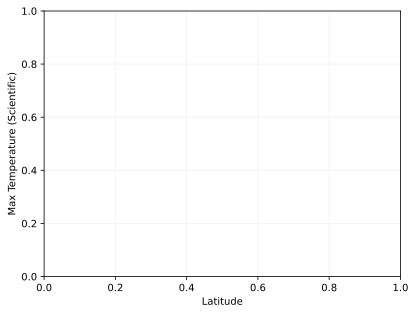

In [197]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Scientific)")
plt.title("City Latitude vs. Max Temperature (2023.01.17)")

# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(
    x,
    y,
    marker="o",
    facecolors="red",
    edgecolors="black",
    alpha=0.028,
)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

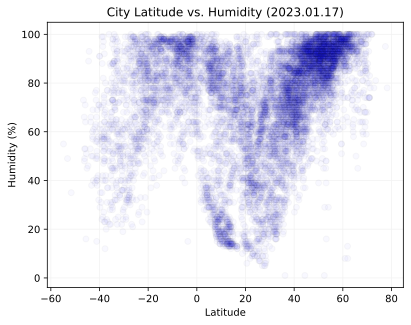

In [143]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023.01.17)")

# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(
    x, 
    y,
    marker="o",
    facecolors="blue",
    edgecolors="black",
    alpha=0.028,
    )

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

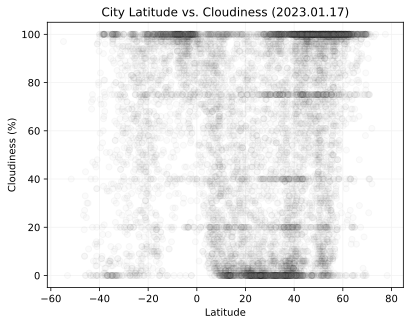

In [144]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023.01.17)")

# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(
    x, 
    y,
    marker="o",
    facecolors="grey",
    edgecolors="black",
    alpha=0.028,
    )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

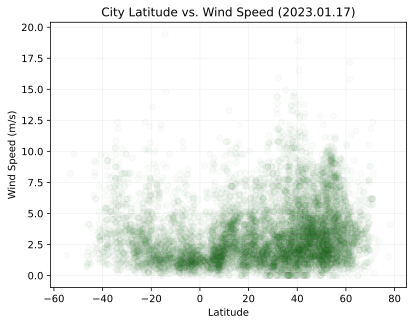

In [151]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023.01.17)")

# Build the scatter plots for latitude vs. humidity
y = city_data_df["Wind Speed"]

plt.scatter(
    x, 
    y,
    marker="o",
    facecolors="green",
    edgecolors="black",
    alpha=0.025,
    )

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [152]:
# Define a function to create Linear Regression plots
def regr(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    return rvalue, regress_values, line_eq

In [184]:
# Define a function to create Linear Regression plots
def regrx(hemi, y_col):   
    if hemi == "N":
        hemi_df = northern_hemi_df
        hemi_title = "Northern Hemisphere"
    elif hemi == "S":
        hemi_df = southern_hemi_df
        hemi_title = "Southern Hemisphere"
    
    x = abs(hemi_df["Lat"])
    y = hemi_df[y_col]
    
    plt.xlabel("Latitude")
    plt.ylabel(y_col)
    plt.title(f"{hemi_title}: {y_col} vs. Latitude")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept   
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x, y, facecolors="grey", alpha=0.028)
    plt.plot(x, regress_values, color="black", linewidth=0.8)
    
    if slope > 0:
        plt.annotate(
            line_eq,
            xy=(x.min(),regress_values.min()),
            xycoords="data",
            xytext=(0,-15),
            textcoords="offset pixels",
            fontsize=11.5,
            color="black"
        )
    else:
        plt.annotate(
            line_eq,
            xy=(x.max(),regress_values.min()),
            xycoords="data",
            xytext=(-120,-20),
            textcoords="offset pixels",
            fontsize=11.5,
            color="black"
        )

    print(f"The r-value is {rvalue}")

In [154]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                 
2        san ramon  37.7799 -121.9780    287.55        65           0   
6         khatanga  71.9667  102.5000    238.38       100          38   
7        saskylakh  71.9167  114.0833    235.63       100          61   
8           bethel  41.3712  -73.4140    281.90        61          20   
11        qaqortoq  60.7167  -46.0333    270.33        74         100   

         Wind Speed Country        Date  
City_ID                                  
2              3.09      US  1674079929  
6              2.99      RU  1674080064  
7              1.75      RU  1674080064  
8              6.17      US  1674080064  
11             3.43      GL  1674080065

In [155]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                    
0                  saint-philippe -21.3585   55.7679    297.92        91   
1        sao jose da coroa grande  -8.8978  -35.1478    298.76        80   
3                   mar del plata -38.0023  -57.5575    296.39        92   
4                           coari  -4.0850  -63.1414    297.49        91   
5                       carnarvon -24.8667  113.6333    298.14        76   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        6.00      RE  1674080061  
1                28        3.80      BR  1674080062  
3               100        8.05      AR  1674080062  
4                92        0.81      BR  1674080063  
5                26        3.16      AU  1674080063

###  Temperature vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

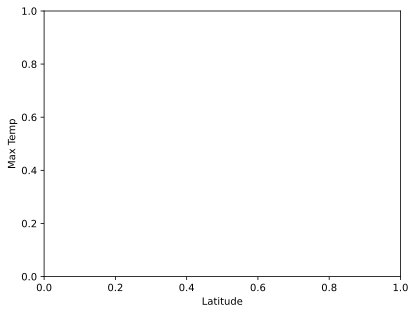

In [186]:
# Linear regression on Northern Hemisphere
regrx("N","Max Temp")

TypeError: 'str' object is not callable

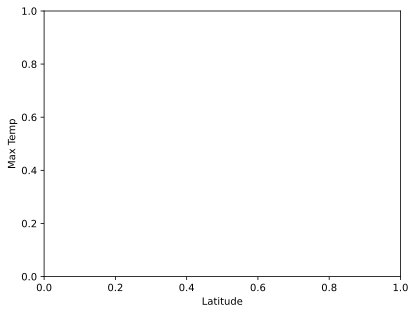

In [185]:
# Linear regression on Southern Hemisphere
regrx("S","Max Temp")

**Discussion about the linear relationship:** 

In both hemispheres, there is a negative (inverse) correlation between temperature and absolute value of latitude. In other words, as latitude increases temperature decreases, and vice versa. This is common sense. 

However, the data yield two more surprising insights. First, Northern Hemisphere data contain significantly less variation than Southern Hemisphere data, and the linear correlation (r-value) is appreciably stronger for the former compared to the latter. Second, the rate of change (slope) of latitude vs. temperature is much more dramatic for the Northern Hemisphere compared to the Southern Hemisphere. As a topic for further investigation, we could query the impact of summer and winter seasons on these last two insights.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.46863947140552775


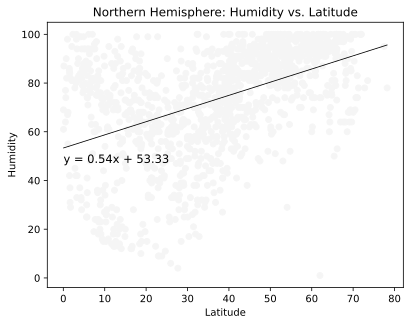

In [104]:
regrx("N","Humidity")

The r-value is -0.5028181770928979


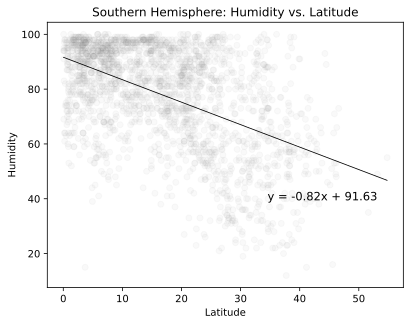

In [164]:
# Southern Hemisphere

regrx("S","Humidity")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a positive correlation between humidity and latitude. In the Southern Hemisphere, the opposite is true: there is a negative relationship between humidity and the absolute value of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.300479841659409


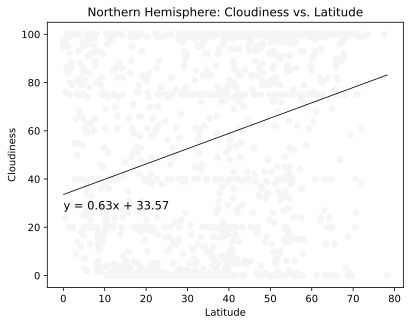

In [108]:
# Northern Hemisphere

regrx("N","Cloudiness")

The r-value is -0.457877002299032


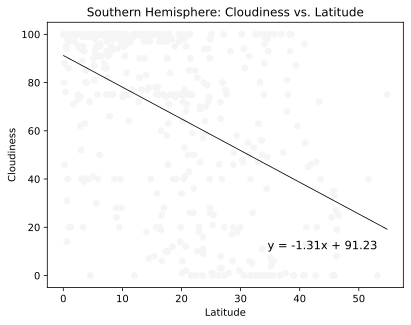

In [109]:
regrx("S", "Cloudiness")

**Discussion about the linear relationship:** In both hemispheres, there is a weak positive correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.06237095144809748


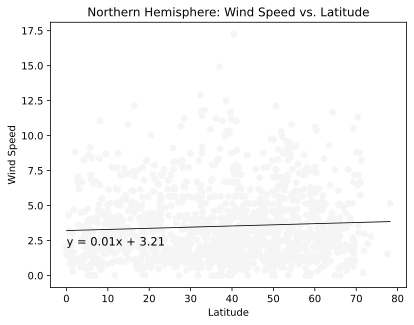

In [110]:
regrx("N","Wind Speed")

The r-value is 0.3212217681532292


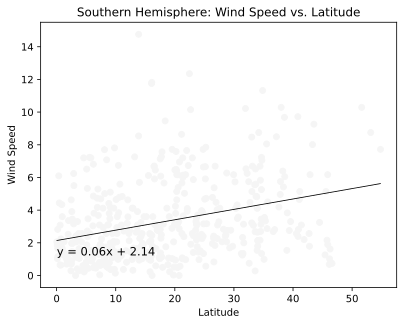

In [111]:
regrx("S","Wind Speed")

**Discussion about the linear relationship:** There is a very weak positive correlation (Northern Hemisphere) and negative correlation (Southern Hemisphere) between latitude and wind speed.